In [38]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [39]:
fn = "start.jpg" # путь к файлу с картинкой
img = cv.imread(fn)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
nRows, nCols = len(gray), len(gray[0])

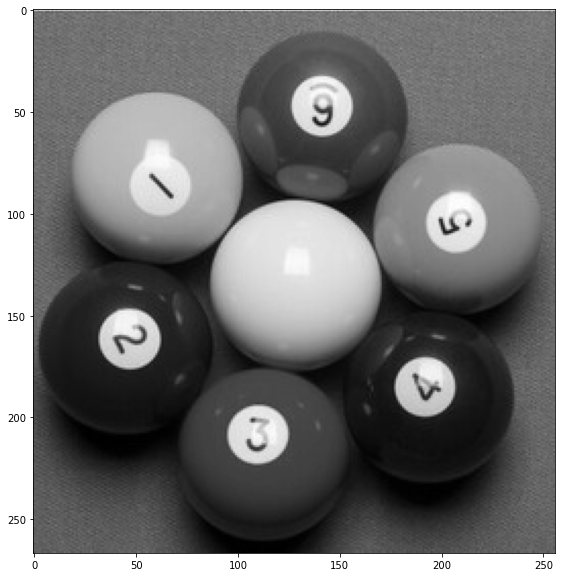

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(gray,'gray')

### Sobel Operator

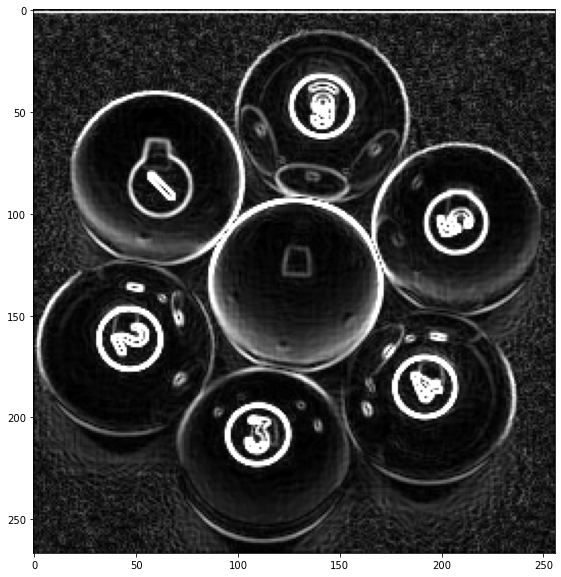

In [41]:
window_name = ('Sobel Demo - Simple Edge Detector')
scale = 1
delta = 0
ddepth = cv.CV_16S
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)


abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)


grad = cv.addWeighted(abs_grad_x, 1, abs_grad_y, 1, 0)
plt.figure(figsize=(10, 10))
plt.imshow(grad,'gray')

### Image Thresholding 

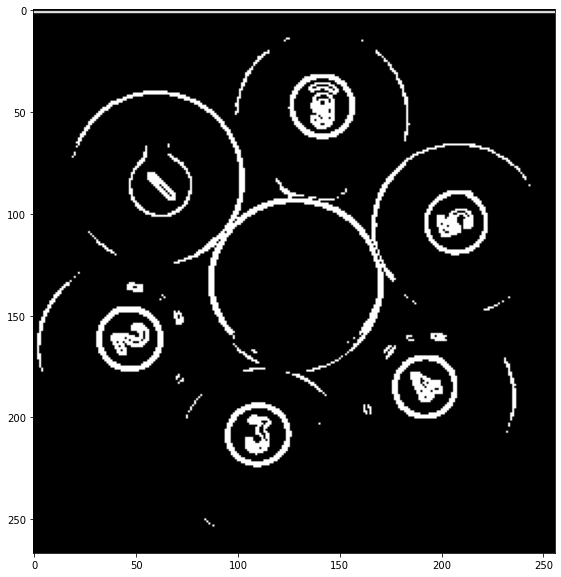

In [42]:
_, th3 = cv.threshold(grad, 0.65*255, 255, cv.THRESH_BINARY)

plt.figure(figsize=(10, 10))
plt.imshow(th3,'gray')

In [43]:
def circularHough(M, rad):
    row, col = np.where(M == 255)
    res = np.zeros_like(M, dtype=np.uint32)  # Инициализация массива для накопления результатов
    for k in range(row.shape[0]):
        x = np.arange(M.shape[0])[:, None] - row[k]  # Разность координат x
        y = np.arange(M.shape[1])[None, :] - col[k]  # Разность координат y
        distance = np.round(np.sqrt(x**2 + y**2))  # Округленное расстояние от центра
        res[distance == rad] += 1  # Увеличиваем счетчик для соответствующих пикселей
    return res

%time result = circularHough(th3,15)

Wall time: 2.32 s


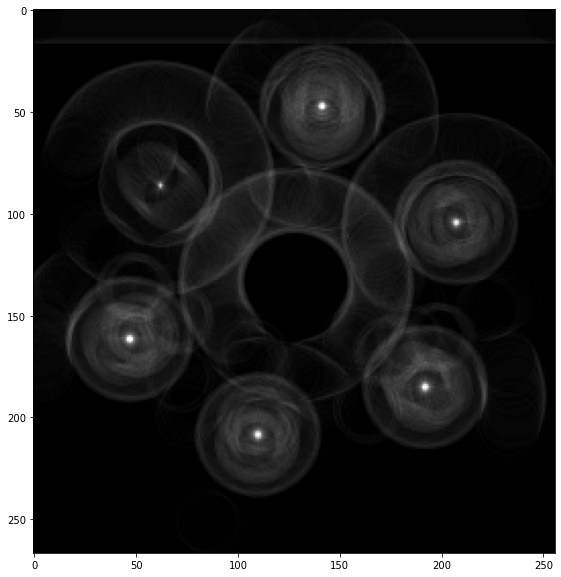

In [44]:
plt.figure(figsize=(10, 10))
plt.imshow(result,'gray')

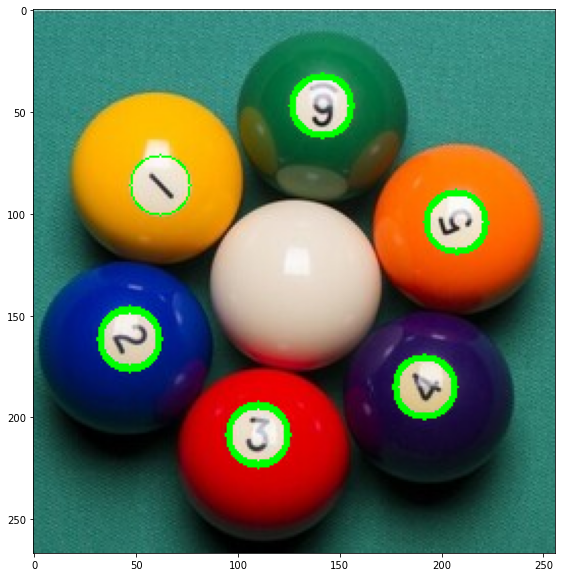

In [45]:
filtered = np.piecewise(result, [result < 60, result>= 60], [0, 255])
row1, col1 = np.where(filtered == 255)

def project_circles(M, x, y, rad, r, c):
    for i in range(r):
        for j in range(c):
            if np.ceil(np.sqrt((i-y)**2 + (j-x)**2)) == rad:
                M[i][j][0] = 0
                M[i][j][1] = 255
                M[i][j][2] = 0

for i in range(len(col1)):
    project_circles(img, col1[i], row1[i], 15, nRows, nCols)
    
#cv.imshow("Original", img)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()